'Not work'

In [86]:
import pandas as pd
import numpy as np
from pycaret.regression import *

# Load your dataset
df = pd.read_csv("data_preprocess\clean_data\songkla_concat_data.csv", parse_dates=["timestamp"], index_col="timestamp")
df = df.sort_values(by="timestamp")
df = df.groupby(['timestamp'], as_index=True).agg({'humidity': 'mean','pm_2_5': 'mean','temperature': 'mean'})
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month
df['day'] = df.index.day
df


,humidity,pm_2_5,temperature,dayofweek,month,day
timestamp,,,,,,
2021-12-01 14:00:00,66.269500,2.000000,24.990000,2,12,1
2021-12-01 15:00:00,60.997426,0.815789,25.950526,2,12,1
2021-12-01 16:00:00,61.093943,1.083333,26.178000,2,12,1
2021-12-01 17:00:00,61.953554,1.098361,26.292459,2,12,1
2021-12-01 18:00:00,61.932943,1.133333,26.525667,2,12,1
...,...,...,...,...,...,...
2025-02-11 11:00:00,62.084135,21.138544,30.818872,1,2,11
2025-02-11 11:12:18,52.840677,31.750000,32.533843,1,2,11
2025-02-11 11:12:43,59.010000,12.920000,31.300000,1,2,11


In [87]:
# Create lag features for the past 7 days
for lag in range(1, 8):  # Lags from 1 to 7 days
    df[f'pm_2_5_lag_{lag}'] = df['pm_2_5'].shift(lag)

# Drop NaN values caused by shifting
df.dropna(inplace=True)
df

,humidity,pm_2_5,temperature,dayofweek,month,day,pm_2_5_lag_1,pm_2_5_lag_2,pm_2_5_lag_3,pm_2_5_lag_4,pm_2_5_lag_5,pm_2_5_lag_6,pm_2_5_lag_7
timestamp,,,,,,,,,,,,,
2021-12-01 21:00:00,63.084160,1.000000,26.532200,2,12,1,1.278689,1.131148,1.133333,1.098361,1.083333,0.815789,2.000000
2021-12-01 22:00:00,63.969960,1.000000,26.450000,2,12,1,1.000000,1.278689,1.131148,1.133333,1.098361,1.083333,0.815789
2021-12-01 23:00:00,63.085219,1.000000,27.644194,2,12,1,1.000000,1.000000,1.278689,1.131148,1.133333,1.098361,1.083333
2021-12-02 00:00:00,62.688135,1.100000,28.375750,3,12,2,1.000000,1.000000,1.000000,1.278689,1.131148,1.133333,1.098361
2021-12-02 01:00:00,63.037461,1.406780,28.659153,3,12,2,1.100000,1.000000,1.000000,1.000000,1.278689,1.131148,1.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-11 11:00:00,62.084135,21.138544,30.818872,1,2,11,24.755387,38.988915,40.896280,36.896111,33.914727,35.262778,37.392919
2025-02-11 11:12:18,52.840677,31.750000,32.533843,1,2,11,21.138544,24.755387,38.988915,40.896280,36.896111,33.914727,35.262778
2025-02-11 11:12:43,59.010000,12.920000,31.300000,1,2,11,31.750000,21.138544,24.755387,38.988915,40.896280,36.896111,33.914727


In [88]:
df.describe()

,humidity,pm_2_5,temperature,dayofweek,month,day,pm_2_5_lag_1,pm_2_5_lag_2,pm_2_5_lag_3,pm_2_5_lag_4,pm_2_5_lag_5,pm_2_5_lag_6,pm_2_5_lag_7
count,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000
mean,74.880887,20.166047,29.038570,2.999593,6.389185,15.713556,20.165316,20.164817,20.164380,20.163245,20.162502,20.161616,20.160246
std,11.361332,11.215880,2.816513,2.000083,3.509272,8.821750,11.216468,11.217015,11.217527,11.217905,11.218505,11.219088,11.219047
min,32.837000,0.644068,22.109060,0.000000,1.000000,1.000000,0.644068,0.644068,0.644068,0.644068,0.644068,0.644068,0.644068
25%,67.429824,11.329343,26.961984,1.000000,3.000000,8.000000,11.328600,11.328220,11.327864,11.327127,11.324165,11.321393,11.320591
50%,76.208166,18.748440,28.380193,3.000000,6.000000,16.000000,18.747533,18.747533,18.747533,18.746437,18.744539,18.743135,18.742555
75%,83.418241,27.562572,30.760371,5.000000,9.000000,23.000000,27.562572,27.562572,27.562572,27.560208,27.560208,27.560208,27.557361
max,100.000000,64.016667,42.069138,6.000000,12.000000,31.000000,64.016667,64.016667,64.016667,64.016667,64.016667,64.016667,64.016667


In [89]:
from scipy import stats
df = df[(np.abs(stats.zscore(df['humidity'])) < 3)]  # ลบค่าผิดปกติออก
df = df[(np.abs(stats.zscore(df['temperature'])) < 3)]  # ลบค่าผิดปกติออก
df = df[(np.abs(stats.zscore(df['pm_2_5'])) < 3)]  # ลบค่าผิดปกติออก

In [90]:
df.describe()

,humidity,pm_2_5,temperature,dayofweek,month,day,pm_2_5_lag_1,pm_2_5_lag_2,pm_2_5_lag_3,pm_2_5_lag_4,pm_2_5_lag_5,pm_2_5_lag_6,pm_2_5_lag_7
count,26849.000000,26849.000000,26849.000000,26849.000000,26849.000000,26849.000000,26849.000000,26849.000000,26849.000000,26849.000000,26849.000000,26849.000000,26849.000000
mean,74.986133,20.131372,29.016089,3.000894,6.397929,15.714291,20.141176,20.141322,20.140412,20.131114,20.115610,20.096900,20.085496
std,11.219833,11.116870,2.784168,2.000261,3.512198,8.823325,11.144371,11.157486,11.170231,11.177252,11.178908,11.174511,11.172026
min,40.810775,0.644068,22.109060,0.000000,1.000000,1.000000,0.644068,0.644068,0.644068,0.644068,0.644068,0.644068,0.644068
25%,67.518447,11.346851,26.960363,1.000000,3.000000,8.000000,11.345833,11.339444,11.337631,11.327878,11.309464,11.295942,11.293333
50%,76.256692,18.760747,28.371096,3.000000,6.000000,16.000000,18.758889,18.754671,18.742332,18.735556,18.710000,18.688333,18.673907
75%,83.439788,27.523728,30.734893,5.000000,9.000000,23.000000,27.523728,27.522222,27.523728,27.512126,27.487500,27.465603,27.441541
max,100.000000,53.640833,37.451016,6.000000,12.000000,31.000000,64.016667,64.016667,64.016667,64.016667,64.016667,64.016667,64.016667


In [91]:
compare_data = df[-7:]  # Last 7 known values
compare_data
df = df[:-7]
compare_data

,humidity,pm_2_5,temperature,dayofweek,month,day,pm_2_5_lag_1,pm_2_5_lag_2,pm_2_5_lag_3,pm_2_5_lag_4,pm_2_5_lag_5,pm_2_5_lag_6,pm_2_5_lag_7
timestamp,,,,,,,,,,,,,
2025-02-11 09:00:00,83.382083,38.988915,26.235494,1,2,11,40.896280,36.896111,33.914727,35.262778,37.392919,38.435847,33.316648
2025-02-11 10:00:00,72.010469,24.755387,28.791270,1,2,11,38.988915,40.896280,36.896111,33.914727,35.262778,37.392919,38.435847
2025-02-11 11:00:00,62.084135,21.138544,30.818872,1,2,11,24.755387,38.988915,40.896280,36.896111,33.914727,35.262778,37.392919
2025-02-11 11:12:18,52.840677,31.750000,32.533843,1,2,11,21.138544,24.755387,38.988915,40.896280,36.896111,33.914727,35.262778
2025-02-11 11:12:43,59.010000,12.920000,31.300000,1,2,11,31.750000,21.138544,24.755387,38.988915,40.896280,36.896111,33.914727
2025-02-11 11:13:14,62.618683,14.615385,30.839804,1,2,11,12.920000,31.750000,21.138544,24.755387,38.988915,40.896280,36.896111
2025-02-11 11:15:36,61.046112,21.000000,31.861472,1,2,11,14.615385,12.920000,31.750000,21.138544,24.755387,38.988915,40.896280


In [92]:
exp = setup(data=df, target='pm_2_5', fold=10, session_id=123, iterative_imputation_iters=100, remove_outliers = True, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

,Description,Value
0,Session id,123
1,Target,pm_2_5
2,Target type,Regression
3,Original data shape,"(26842, 13)"
4,Transformed data shape,"(25902, 13)"
5,Transformed train set shape,"(17849, 13)"
6,Transformed test set shape,"(8053, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

In [93]:
best_model = exp.compare_models()  # Find the best regression model

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,2.6875,14.6482,3.8255,0.8814,0.2197,0.1851,1.3490
et,Extra Trees Regressor,2.7393,15.1077,3.8845,0.8776,0.2229,0.1885,1.0830
gbr,Gradient Boosting Regressor,2.7430,15.1621,3.8922,0.8772,0.2239,0.1911,6.2780
rf,Random Forest Regressor,2.7599,15.4224,3.9249,0.8751,0.2246,0.1899,2.6480
lr,Linear Regression,2.7924,15.6706,3.9570,0.8731,0.2272,0.1935,0.3120
ridge,Ridge Regression,2.7924,15.6706,3.9570,0.8731,0.2272,0.1935,0.2700
br,Bayesian Ridge,2.7925,15.6705,3.9570,0.8731,0.2272,0.1935,0.4070
lar,Least Angle Regression,2.7981,15.7103,3.9619,0.8727,0.2276,0.1938,0.3020
en,Elastic Net,2.8154,15.9156,3.9879,0.8711,0.2286,0.1966,0.2950
huber,Huber Regressor,2.7469,15.9633,3.9935,0.8707,0.2255,0.1850,0.5290


In [94]:
best_model = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.7154,15.4018,3.9245,0.8747,0.2259,0.1919
1,2.6960,14.3224,3.7845,0.8866,0.2209,0.1873
2,2.6988,15.2289,3.9024,0.8818,0.2313,0.1947
3,2.5951,13.3951,3.6599,0.8992,0.2118,0.1802
4,2.6689,13.7565,3.7090,0.8870,0.2142,0.1780
5,2.7829,16.2036,4.0254,0.8666,0.2271,0.1888
6,2.7100,15.4039,3.9248,0.8706,0.2253,0.1889
7,2.7387,14.9333,3.8644,0.8742,0.2135,0.1814
8,2.5797,13.4105,3.6620,0.8907,0.2147,0.1826


In [95]:
exp.predict_model(best_model,data=df)  # Train the best model on the entire dataset

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2.4885,12.2670,3.5024,0.9007,0.2051,0.1713


,humidity,temperature,dayofweek,month,day,pm_2_5_lag_1,pm_2_5_lag_2,pm_2_5_lag_3,pm_2_5_lag_4,pm_2_5_lag_5,pm_2_5_lag_6,pm_2_5_lag_7,pm_2_5,prediction_label
timestamp,,,,,,,,,,,,,,
2021-12-01 21:00:00,63.084160,26.532200,2,12,1,1.278689,1.131148,1.133333,1.098361,1.083333,0.815789,2.000000,1.000000,3.415882
2021-12-01 22:00:00,63.969959,26.450001,2,12,1,1.000000,1.278689,1.131148,1.133333,1.098361,1.083333,0.815789,1.000000,3.415882
2021-12-01 23:00:00,63.085220,27.644194,2,12,1,1.000000,1.000000,1.278689,1.131148,1.133333,1.098361,1.083333,1.000000,2.968711
2021-12-02 00:00:00,62.688133,28.375750,3,12,2,1.000000,1.000000,1.000000,1.278689,1.131148,1.133333,1.098361,1.100000,2.707776
2021-12-02 01:00:00,63.037460,28.659153,3,12,2,1.100000,1.000000,1.000000,1.000000,1.278689,1.131148,1.133333,1.406780,2.725999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-11 04:00:00,84.026367,25.281784,1,2,11,38.435848,33.316647,29.889906,28.142221,25.121204,24.499580,24.527082,37.392918,39.722088
2025-02-11 05:00:00,84.675880,25.144388,1,2,11,37.392918,38.435848,33.316647,29.889906,28.142221,25.121204,24.499580,35.262779,38.861931
2025-02-11 06:00:00,85.418015,25.010298,1,2,11,35.262779,37.392918,38.435848,33.316647,29.889906,28.142221,25.121204,33.914726,36.639577


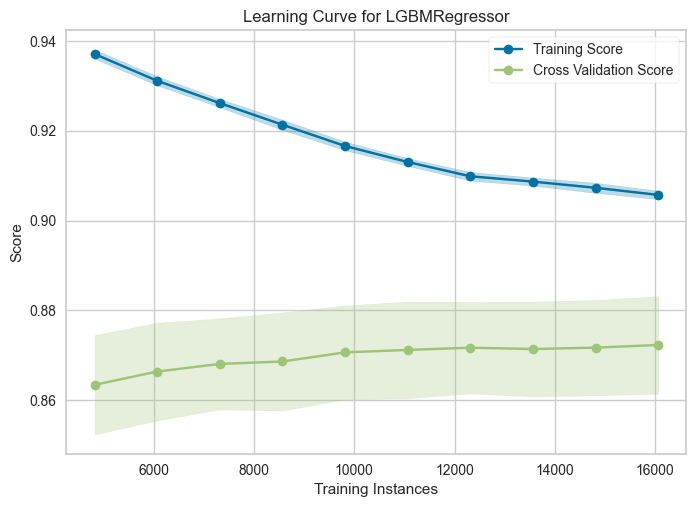

In [96]:
exp.plot_model(best_model, plot='learning')

In [97]:
# Get the last row (most recent data point)
latest_data = df.iloc[-1:].copy()

# Shift lag features forward by 1 day
for lag in range(1, 8):
    latest_data[f'pm_2_5_lag_{lag}'] = df['pm_2_5'].iloc[-lag]

# Make predictions
future_pred = exp.predict_model(best_model, data=latest_data)
future_pred

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.4582,0.2099,0.4582,nan,0.0110,0.0112


,humidity,temperature,dayofweek,month,day,pm_2_5_lag_1,pm_2_5_lag_2,pm_2_5_lag_3,pm_2_5_lag_4,pm_2_5_lag_5,pm_2_5_lag_6,pm_2_5_lag_7,pm_2_5,prediction_label
timestamp,,,,,,,,,,,,,,
2025-02-11 08:00:00,89.040222,24.355221,1,2,11,40.896278,36.896111,33.914726,35.262779,37.392918,38.435848,33.316647,40.896278,40.438128


**Test with other Data**
use data_preprocess\export-pm25_eng-1d.csv to test best_model

In [98]:
df_test = pd.read_csv("data_preprocess\export-r202_test_nbiot-1h.csv", parse_dates=["timestamp"], index_col="timestamp")
df_test = df_test.sort_values(by="timestamp")
df_test['dayofweek'] = df_test.index.dayofweek
df_test['month'] = df_test.index.month
df_test['day'] = df_test.index.day

In [99]:
# Create lag features for the past 7 days
for lag in range(1, 8):  # Lags from 1 to 7 days
    df_test[f'pm_2_5_lag_{lag}'] = df_test['pm_2_5'].shift(lag)

# Drop NaN values caused by shifting
df_test.dropna(inplace=True)
df_test = df_test.drop(columns=["Unnamed: 0", "timezone", "pm_2_5_sp", 'pm_10'], axis=1)

In [100]:
df_test = df_test[(np.abs(stats.zscore(df_test['humidity'])) < 3)]  # ลบค่าผิดปกติออก
df_test = df_test[(np.abs(stats.zscore(df_test['temperature'])) < 3)]  # ลบค่าผิดปกติออก
df_test = df_test[(np.abs(stats.zscore(df_test['pm_2_5'])) < 3)]  # ลบค่าผิดปกติออก

In [101]:
predict_df_test = exp.predict_model(best_model, data=df_test)
predict_df_test

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,3.4651,26.6104,5.1585,0.8358,0.2940,0.2695


,humidity,temperature,dayofweek,month,day,pm_2_5_lag_1,pm_2_5_lag_2,pm_2_5_lag_3,pm_2_5_lag_4,pm_2_5_lag_5,pm_2_5_lag_6,pm_2_5_lag_7,pm_2_5,prediction_label
timestamp,,,,,,,,,,,,,,
2023-04-09 19:00:00,64.539894,32.495163,6,4,9,13.483334,12.326530,11.590909,10.944445,3.916667,3.500000,1.000000,15.333333,13.878132
2023-04-09 20:00:00,64.838257,32.314560,6,4,9,15.333333,13.483334,12.326530,11.590909,10.944445,3.916667,3.500000,17.633333,15.450099
2023-04-09 21:00:00,63.953362,32.994701,6,4,9,17.633333,15.333333,13.483334,12.326530,11.590909,10.944445,3.916667,15.881356,18.096003
2023-04-09 22:00:00,64.680077,33.120392,6,4,9,15.881356,17.633333,15.333333,13.483334,12.326530,11.590909,10.944445,15.966666,15.292516
2023-04-09 23:00:00,68.699341,33.047546,6,4,9,15.966666,15.881356,17.633333,15.333333,13.483334,12.326530,11.590909,17.700001,16.401320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-26 12:00:00,62.034443,32.720982,2,6,26,48.716667,63.083332,93.949997,86.440681,90.983330,91.533333,61.349998,40.650002,40.334594
2024-06-26 13:00:00,57.990635,33.358208,2,6,26,40.650002,48.716667,63.083332,93.949997,86.440681,90.983330,91.533333,35.633335,33.541741
2024-06-26 14:00:00,66.245377,32.688988,2,6,26,35.633335,40.650002,48.716667,63.083332,93.949997,86.440681,90.983330,42.216667,31.960219


In [102]:
from pycaret.regression import *
from sklearn.metrics import r2_score


In [103]:
# Predict on a test set (known values)
test_predictions2 = exp.predict_model(best_model, data=compare_data)  # Last 7 known values
test_predictions2
# Compute R² manually


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,7.5986,92.1993,9.6020,-0.2601,0.4041,0.4021


,humidity,temperature,dayofweek,month,day,pm_2_5_lag_1,pm_2_5_lag_2,pm_2_5_lag_3,pm_2_5_lag_4,pm_2_5_lag_5,pm_2_5_lag_6,pm_2_5_lag_7,pm_2_5,prediction_label
timestamp,,,,,,,,,,,,,,
2025-02-11 09:00:00,83.382080,26.235495,1,2,11,40.896278,36.896111,33.914726,35.262779,37.392918,38.435848,33.316647,38.988914,40.726795
2025-02-11 10:00:00,72.010468,28.791271,1,2,11,38.988914,40.896278,36.896111,33.914726,35.262779,37.392918,38.435848,24.755386,37.612572
2025-02-11 11:00:00,62.084137,30.818872,1,2,11,24.755386,38.988914,40.896278,36.896111,33.914726,35.262779,37.392918,21.138544,22.396510
2025-02-11 11:12:18,52.840675,32.533844,1,2,11,21.138544,24.755386,38.988914,40.896278,36.896111,33.914726,35.262779,31.750000,20.666717
2025-02-11 11:12:43,59.009998,31.299999,1,2,11,31.750000,21.138544,24.755386,38.988914,40.896278,36.896111,33.914726,12.920000,30.620981
2025-02-11 11:13:14,62.618683,30.839804,1,2,11,12.920000,31.750000,21.138544,24.755386,38.988914,40.896278,36.896111,14.615385,11.510327
2025-02-11 11:15:36,61.046112,31.861471,1,2,11,14.615385,12.920000,31.750000,21.138544,24.755386,38.988914,40.896278,21.000000,15.552050


In [104]:
r2 = r2_score(compare_data["pm_2_5"], test_predictions2["prediction_label"])
print("R² Score on Test Data:", r2)

R² Score on Test Data: -0.2600936799588123


**Predict Future 7 days**


เอาเป็นรายวันเลย ไม่ work

In [107]:
# สร้างฟังก์ชันสำหรับหาค่าเฉลี่ยจากข้อมูลในอดีตตามวันและเดือน
def get_estimated_value(df, date, column):
    """
    หาค่าเฉลี่ยของคอลัมน์ที่ระบุจากข้อมูลในอดีต โดยใช้เงื่อนไขวันและเดือนเดียวกัน
    
    Parameters:
    df (DataFrame): DataFrame ที่มีข้อมูลในอดีต
    date (Timestamp): วันที่ต้องการประมาณค่า
    column (str): ชื่อคอลัมน์ที่ต้องการหาค่าเฉลี่ย
    
    Returns:
    float: ค่าเฉลี่ยของคอลัมน์ที่ระบุ
    """
    # หาข้อมูลที่มีเดือนและวันเดียวกัน
    historical_data = df[(df.index.month == date.month) & (df.index.day == date.day)]
    
    if len(historical_data) > 0:
        # ถ้ามีข้อมูลในวันและเดือนเดียวกัน
        return historical_data[column].mean()
    elif len(df[df.index.month == date.month]) > 0:
        # ถ้าไม่มีข้อมูลในวันเดียวกัน ให้ใช้ข้อมูลในเดือนเดียวกัน
        return df[df.index.month == date.month][column].mean()
    else:
        # ถ้าไม่มีข้อมูลที่เกี่ยวข้องเลย ให้ใช้ค่าเฉลี่ยทั้งหมด
        return df[column].mean()

# สร้างช่วงเวลาในอนาคต
future_dates = pd.date_range(start=df.index[-1], periods=8, freq='H')[1:]
future_predictions = []
latest_input = latest_data.copy()

# เก็บ DataFrame เดิมไว้สำหรับการอ้างอิงค่าในอดีต
historical_df = df.copy()

for date in future_dates:
    # อัปเดตคุณลักษณะตามเวลา
    latest_input['dayofweek'] = date.dayofweek
    latest_input['month'] = date.month
    latest_input['day'] = date.day
    
    # อัปเดตคุณลักษณะสภาพอากาศโดยใช้ค่าเฉลี่ยจากข้อมูลในอดีต
    latest_input['temperature'] = get_estimated_value(historical_df, date, 'temperature')
    latest_input['humidity'] = get_estimated_value(historical_df, date, 'humidity')
    
    # ทำนายค่า PM2.5
    pred = exp.predict_model(best_model, data=latest_input)['prediction_label'].values[0]
    
    # เก็บค่าทำนาย
    future_predictions.append((date, pred))
    
    # อัปเดต lag features
    for lag in range(7, 1, -1):
        latest_input[f'pm_2_5_lag_{lag}'] = latest_input[f'pm_2_5_lag_{lag-1}']
    latest_input[f'pm_2_5_lag_1'] = pred

# แปลงเป็น DataFrame
future_df = pd.DataFrame(future_predictions, columns=['timestamp', 'pm_2_5'])
future_df.set_index('timestamp', inplace=True)
future_df

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,3.0991,9.6047,3.0991,nan,0.0769,0.0758


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,4.3097,18.5733,4.3097,nan,0.1085,0.1054


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,5.3189,28.2910,5.3189,nan,0.1358,0.1301


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,6.5216,42.5315,6.5216,nan,0.1692,0.1595


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,6.8306,46.6575,6.8306,nan,0.1780,0.1670


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,7.0329,49.4623,7.0329,nan,0.1838,0.1720


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,7.9280,62.8536,7.9280,nan,0.2098,0.1939


,pm_2_5
timestamp,
2025-02-11 09:00:00,37.797129
2025-02-11 10:00:00,36.586600
2025-02-11 11:00:00,35.577354
2025-02-11 12:00:00,34.374660
2025-02-11 13:00:00,34.065651
2025-02-11 14:00:00,33.863335
2025-02-11 15:00:00,32.968252


In [109]:
compare_data['pm_2_5']

timestamp
2025-02-11 09:00:00    38.988915
2025-02-11 10:00:00    24.755387
2025-02-11 11:00:00    21.138544
2025-02-11 11:12:18    31.750000
2025-02-11 11:12:43    12.920000
2025-02-11 11:13:14    14.615385
2025-02-11 11:15:36    21.000000
Name: pm_2_5, dtype: float64

เอาเป็นรายชั่วโมง แล้วมาเฉลี่ยเป็นรายวัน มีทรงกว่า

In [106]:
# สร้างฟังก์ชันสำหรับหาค่าเฉลี่ยจากข้อมูลในอดีตตามวันและเดือน
def get_estimated_value(df, date, column):
    """
    หาค่าเฉลี่ยของคอลัมน์ที่ระบุจากข้อมูลในอดีต โดยใช้เงื่อนไขวันและเดือนเดียวกัน
    
    Parameters:
    df (DataFrame): DataFrame ที่มีข้อมูลในอดีต
    date (Timestamp): วันที่ต้องการประมาณค่า
    column (str): ชื่อคอลัมน์ที่ต้องการหาค่าเฉลี่ย
    
    Returns:
    float: ค่าเฉลี่ยของคอลัมน์ที่ระบุ
    """
    # หาข้อมูลที่มีเดือนและวันเดียวกัน
    historical_data = df[(df.index.month == date.month) & (df.index.day == date.day)]
    
    if len(historical_data) > 0:
        # ถ้ามีข้อมูลในวันและเดือนเดียวกัน
        return historical_data[column].mean()
    elif len(df[df.index.month == date.month]) > 0:
        # ถ้าไม่มีข้อมูลในวันเดียวกัน ให้ใช้ข้อมูลในเดือนเดียวกัน
        return df[df.index.month == date.month][column].mean()
    else:
        # ถ้าไม่มีข้อมูลที่เกี่ยวข้องเลย ให้ใช้ค่าเฉลี่ยทั้งหมด
        return df[column].mean()

# สร้างช่วงเวลาในอนาคต
future_dates = pd.date_range(start=df.index[-1], periods=169, freq='H')[1:]
future_predictions = []
latest_input = latest_data.copy()

# เก็บ DataFrame เดิมไว้สำหรับการอ้างอิงค่าในอดีต
historical_df = df.copy()

for date in future_dates:
    # อัปเดตคุณลักษณะตามเวลา
    latest_input['dayofweek'] = date.dayofweek
    latest_input['month'] = date.month
    latest_input['day'] = date.day
    
    # อัปเดตคุณลักษณะสภาพอากาศโดยใช้ค่าเฉลี่ยจากข้อมูลในอดีต
    latest_input['temperature'] = get_estimated_value(historical_df, date, 'temperature')
    latest_input['humidity'] = get_estimated_value(historical_df, date, 'humidity')
    
    # ทำนายค่า PM2.5
    pred = exp.predict_model(best_model, data=latest_input)['prediction_label'].values[0]
    
    # เก็บค่าทำนาย
    future_predictions.append((date, pred))
    
    # อัปเดต lag features
    for lag in range(7, 1, -1):
        latest_input[f'pm_2_5_lag_{lag}'] = latest_input[f'pm_2_5_lag_{lag-1}']
    latest_input[f'pm_2_5_lag_1'] = pred

# แปลงเป็น DataFrame
future_df = pd.DataFrame(future_predictions, columns=['timestamp', 'pm_2_5'])
future_df.set_index('timestamp', inplace=True)
daily_future_df = future_df.resample('D').mean()  # เฉลี่ยเป็นรายวัน
daily_future_df

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,4.3097,18.5733,4.3097,nan,0.1085,0.1054


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,5.3189,28.2910,5.3189,nan,0.1358,0.1301


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,6.5216,42.5315,6.5216,nan,0.1692,0.1595


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,6.8306,46.6575,6.8306,nan,0.1780,0.1670


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,7.0329,49.4623,7.0329,nan,0.1838,0.1720


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,7.9280,62.8536,7.9280,nan,0.2098,0.1939


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.7856,95.7576,9.7856,nan,0.2660,0.2393


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3103,86.6816,9.3103,nan,0.2513,0.2277


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2146,84.9096,9.2146,nan,0.2484,0.2253


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5166,90.5656,9.5166,nan,0.2577,0.2327


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5166,90.5656,9.5166,nan,0.2577,0.2327


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2146,84.9096,9.2146,nan,0.2484,0.2253


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2146,84.9096,9.2146,nan,0.2484,0.2253


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5166,90.5656,9.5166,nan,0.2577,0.2327


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.4834,89.9350,9.4834,nan,0.2566,0.2319


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.0623,82.1246,9.0623,nan,0.2437,0.2216


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.0016,81.0297,9.0016,nan,0.2419,0.2201


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2691,85.9154,9.2691,nan,0.2501,0.2266


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.4834,89.9350,9.4834,nan,0.2566,0.2319


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2621,85.7865,9.2621,nan,0.2498,0.2265


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.0623,82.1246,9.0623,nan,0.2437,0.2216


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2691,85.9154,9.2691,nan,0.2501,0.2266


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.4834,89.9350,9.4834,nan,0.2566,0.2319


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.4834,89.9350,9.4834,nan,0.2566,0.2319


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.0623,82.1246,9.0623,nan,0.2437,0.2216


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.0016,81.0297,9.0016,nan,0.2419,0.2201


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2691,85.9154,9.2691,nan,0.2501,0.2266


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.4834,89.9350,9.4834,nan,0.2566,0.2319


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2621,85.7865,9.2621,nan,0.2498,0.2265


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.0623,82.1246,9.0623,nan,0.2437,0.2216


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2691,85.9154,9.2691,nan,0.2501,0.2266


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.4834,89.9350,9.4834,nan,0.2566,0.2319


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.4834,89.9350,9.4834,nan,0.2566,0.2319


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.0623,82.1246,9.0623,nan,0.2437,0.2216


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.0016,81.0297,9.0016,nan,0.2419,0.2201


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2691,85.9154,9.2691,nan,0.2501,0.2266


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.4834,89.9350,9.4834,nan,0.2566,0.2319


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2621,85.7865,9.2621,nan,0.2498,0.2265


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3078,86.6353,9.3078,nan,0.2512,0.2276


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.7290,94.6525,9.7290,nan,0.2642,0.2379


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.7290,94.6525,9.7290,nan,0.2642,0.2379


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3078,86.6353,9.3078,nan,0.2512,0.2276


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3078,86.6353,9.3078,nan,0.2512,0.2276


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.7290,94.6525,9.7290,nan,0.2642,0.2379


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.7290,94.6525,9.7290,nan,0.2642,0.2379


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3078,86.6353,9.3078,nan,0.2512,0.2276


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3078,86.6353,9.3078,nan,0.2512,0.2276


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.7290,94.6525,9.7290,nan,0.2642,0.2379


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.7290,94.6525,9.7290,nan,0.2642,0.2379


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3078,86.6353,9.3078,nan,0.2512,0.2276


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3078,86.6353,9.3078,nan,0.2512,0.2276


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.7290,94.6525,9.7290,nan,0.2642,0.2379


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.7290,94.6525,9.7290,nan,0.2642,0.2379


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3078,86.6353,9.3078,nan,0.2512,0.2276


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3078,86.6353,9.3078,nan,0.2512,0.2276


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.7290,94.6525,9.7290,nan,0.2642,0.2379


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.7290,94.6525,9.7290,nan,0.2642,0.2379


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3078,86.6353,9.3078,nan,0.2512,0.2276


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3078,86.6353,9.3078,nan,0.2512,0.2276


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.7290,94.6525,9.7290,nan,0.2642,0.2379


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.7290,94.6525,9.7290,nan,0.2642,0.2379


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3078,86.6353,9.3078,nan,0.2512,0.2276


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3535,87.4884,9.3535,nan,0.2526,0.2287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.7747,95.5442,9.7747,nan,0.2657,0.2390


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.7747,95.5442,9.7747,nan,0.2657,0.2390


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3535,87.4884,9.3535,nan,0.2526,0.2287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3535,87.4884,9.3535,nan,0.2526,0.2287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.7747,95.5442,9.7747,nan,0.2657,0.2390


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.7747,95.5442,9.7747,nan,0.2657,0.2390


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3535,87.4884,9.3535,nan,0.2526,0.2287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3535,87.4884,9.3535,nan,0.2526,0.2287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.7747,95.5442,9.7747,nan,0.2657,0.2390


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.7747,95.5442,9.7747,nan,0.2657,0.2390


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3535,87.4884,9.3535,nan,0.2526,0.2287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3535,87.4884,9.3535,nan,0.2526,0.2287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.7747,95.5442,9.7747,nan,0.2657,0.2390


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.7747,95.5442,9.7747,nan,0.2657,0.2390


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3535,87.4884,9.3535,nan,0.2526,0.2287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3535,87.4884,9.3535,nan,0.2526,0.2287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.7747,95.5442,9.7747,nan,0.2657,0.2390


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.7747,95.5442,9.7747,nan,0.2657,0.2390


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3535,87.4884,9.3535,nan,0.2526,0.2287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3535,87.4884,9.3535,nan,0.2526,0.2287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.7747,95.5442,9.7747,nan,0.2657,0.2390


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.7747,95.5442,9.7747,nan,0.2657,0.2390


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3535,87.4884,9.3535,nan,0.2526,0.2287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2006,84.6508,9.2006,nan,0.2480,0.2250


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5025,90.2984,9.5025,nan,0.2572,0.2324


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5025,90.2984,9.5025,nan,0.2572,0.2324


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2006,84.6508,9.2006,nan,0.2480,0.2250


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2006,84.6508,9.2006,nan,0.2480,0.2250


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5025,90.2984,9.5025,nan,0.2572,0.2324


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5025,90.2984,9.5025,nan,0.2572,0.2324


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2006,84.6508,9.2006,nan,0.2480,0.2250


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2006,84.6508,9.2006,nan,0.2480,0.2250


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5025,90.2984,9.5025,nan,0.2572,0.2324


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5025,90.2984,9.5025,nan,0.2572,0.2324


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2006,84.6508,9.2006,nan,0.2480,0.2250


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2006,84.6508,9.2006,nan,0.2480,0.2250


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5025,90.2984,9.5025,nan,0.2572,0.2324


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5025,90.2984,9.5025,nan,0.2572,0.2324


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2006,84.6508,9.2006,nan,0.2480,0.2250


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2006,84.6508,9.2006,nan,0.2480,0.2250


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5025,90.2984,9.5025,nan,0.2572,0.2324


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5025,90.2984,9.5025,nan,0.2572,0.2324


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2006,84.6508,9.2006,nan,0.2480,0.2250


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2006,84.6508,9.2006,nan,0.2480,0.2250


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5025,90.2984,9.5025,nan,0.2572,0.2324


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5025,90.2984,9.5025,nan,0.2572,0.2324


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2006,84.6508,9.2006,nan,0.2480,0.2250


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2006,84.6508,9.2006,nan,0.2480,0.2250


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2559,85.6722,9.2559,nan,0.2496,0.2263


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2559,85.6722,9.2559,nan,0.2496,0.2263


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2559,85.6722,9.2559,nan,0.2496,0.2263


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2559,85.6722,9.2559,nan,0.2496,0.2263


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2559,85.6722,9.2559,nan,0.2496,0.2263


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2559,85.6722,9.2559,nan,0.2496,0.2263


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2559,85.6722,9.2559,nan,0.2496,0.2263


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2559,85.6722,9.2559,nan,0.2496,0.2263


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2559,85.6722,9.2559,nan,0.2496,0.2263


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2559,85.6722,9.2559,nan,0.2496,0.2263


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2559,85.6722,9.2559,nan,0.2496,0.2263


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2559,85.6722,9.2559,nan,0.2496,0.2263


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2559,85.6722,9.2559,nan,0.2496,0.2263


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2559,85.6722,9.2559,nan,0.2496,0.2263


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2559,85.6722,9.2559,nan,0.2496,0.2263


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2559,85.6722,9.2559,nan,0.2496,0.2263


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2559,85.6722,9.2559,nan,0.2496,0.2263


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2559,85.6722,9.2559,nan,0.2496,0.2263


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2559,85.6722,9.2559,nan,0.2496,0.2263


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2559,85.6722,9.2559,nan,0.2496,0.2263


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2559,85.6722,9.2559,nan,0.2496,0.2263


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2559,85.6722,9.2559,nan,0.2496,0.2263


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.2559,85.6722,9.2559,nan,0.2496,0.2263


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5895,91.9583,9.5895,nan,0.2599,0.2345


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5895,91.9583,9.5895,nan,0.2599,0.2345


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3535,87.4884,9.3535,nan,0.2526,0.2287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3535,87.4884,9.3535,nan,0.2526,0.2287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5895,91.9583,9.5895,nan,0.2599,0.2345


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5895,91.9583,9.5895,nan,0.2599,0.2345


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3535,87.4884,9.3535,nan,0.2526,0.2287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3535,87.4884,9.3535,nan,0.2526,0.2287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5895,91.9583,9.5895,nan,0.2599,0.2345


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5895,91.9583,9.5895,nan,0.2599,0.2345


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3535,87.4884,9.3535,nan,0.2526,0.2287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3535,87.4884,9.3535,nan,0.2526,0.2287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5895,91.9583,9.5895,nan,0.2599,0.2345


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5895,91.9583,9.5895,nan,0.2599,0.2345


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3535,87.4884,9.3535,nan,0.2526,0.2287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3535,87.4884,9.3535,nan,0.2526,0.2287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5895,91.9583,9.5895,nan,0.2599,0.2345


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5895,91.9583,9.5895,nan,0.2599,0.2345


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3535,87.4884,9.3535,nan,0.2526,0.2287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3535,87.4884,9.3535,nan,0.2526,0.2287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5895,91.9583,9.5895,nan,0.2599,0.2345


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5895,91.9583,9.5895,nan,0.2599,0.2345


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3535,87.4884,9.3535,nan,0.2526,0.2287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3535,87.4884,9.3535,nan,0.2526,0.2287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5895,91.9583,9.5895,nan,0.2599,0.2345


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5895,91.9583,9.5895,nan,0.2599,0.2345


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3535,87.4884,9.3535,nan,0.2526,0.2287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3535,87.4884,9.3535,nan,0.2526,0.2287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5895,91.9583,9.5895,nan,0.2599,0.2345


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5895,91.9583,9.5895,nan,0.2599,0.2345


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3535,87.4884,9.3535,nan,0.2526,0.2287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3535,87.4884,9.3535,nan,0.2526,0.2287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.5895,91.9583,9.5895,nan,0.2599,0.2345


,pm_2_5
timestamp,
2025-02-11,33.140908
2025-02-12,31.633149
2025-02-13,31.377899
2025-02-14,31.332180
2025-02-15,31.544711
2025-02-16,31.642656
2025-02-17,31.424771
2025-02-18,31.411662


**Find r2 of predict**

เทียบความแม่นยำกับข้อมูลตัวที่ตัดออกไป

In [22]:
from pycaret.regression import *
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predict on the test set
test_predictions = exp.predict_model(best_model, data=compare_data)  # Last 7 known values

# Extract actual values and predicted values
y_true = compare_data["pm_2_5"].values
y_pred = test_predictions["prediction_label"].values  # "prediction_label" contains predictions

# Calculate Regression Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate Accuracy as (1 - (MAE / mean_actual)) * 100
mean_actual = np.mean(y_true)  # Mean of actual values
accuracy = (1 - (mae / mean_actual)) * 100  # Accuracy in percentage

# Print Results
print(f"R² Score: {r2:.4f}")  # Closer to 1 is better
print(f"Mean Absolute Error (MAE): {mae:.4f}")  # Lower is better
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")  # Lower is better
print(f"Accuracy: {accuracy:.2f}%")  # Accuracy percentage


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2.8827,28.4557,5.3344,0.3819,0.1738,0.1156


R² Score: 0.3819
Mean Absolute Error (MAE): 2.8827
Root Mean Squared Error (RMSE): 5.3344
Accuracy: 90.03%


เทียบกับตัว data ที่ใช้ train

In [23]:
from pycaret.regression import *
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predict on the test set
test_predictions = exp.predict_model(best_model, data=df)

# Extract actual values and predicted values
y_true = df["pm_2_5"].values
y_pred = test_predictions["prediction_label"].values  # "prediction_label" contains predictions

# Calculate Regression Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate Accuracy as (1 - (MAE / mean_actual)) * 100
mean_actual = np.mean(y_true)  # Mean of actual values
accuracy = (1 - (mae / mean_actual)) * 100  # Accuracy in percentage

# Print Results
print(f"R² Score: {r2:.4f}")  # Closer to 1 is better
print(f"Mean Absolute Error (MAE): {mae:.4f}")  # Lower is better
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")  # Lower is better
print(f"Accuracy: {accuracy:.2f}%")  # Accuracy percentage


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2.8906,17.9795,4.2402,0.8841,0.2473,0.2084


R² Score: 0.8841
Mean Absolute Error (MAE): 2.8906
Root Mean Squared Error (RMSE): 4.2402
Accuracy: 86.22%


เทียบกับ data อื่นที่เอามา Test

In [24]:
from pycaret.regression import *
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predict on the test set
test_predictions = exp.predict_model(best_model, data=df_test)

# Extract actual values and predicted values
y_true = df_test["pm_2_5"].values
y_pred = test_predictions["prediction_label"].values  # "prediction_label" contains predictions

# Calculate Regression Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate Accuracy as (1 - (MAE / mean_actual)) * 100
mean_actual = np.mean(y_true)  # Mean of actual values
accuracy = (1 - (mae / mean_actual)) * 100  # Accuracy in percentage

# Print Results
print(f"R² Score: {r2:.4f}")  # Closer to 1 is better
print(f"Mean Absolute Error (MAE): {mae:.4f}")  # Lower is better
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")  # Lower is better
print(f"Accuracy: {accuracy:.2f}%")  # Accuracy percentage


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,3.3682,24.1663,4.9159,0.8509,0.2987,0.2841


R² Score: 0.8509
Mean Absolute Error (MAE): 3.3682
Root Mean Squared Error (RMSE): 4.9159
Accuracy: 83.28%


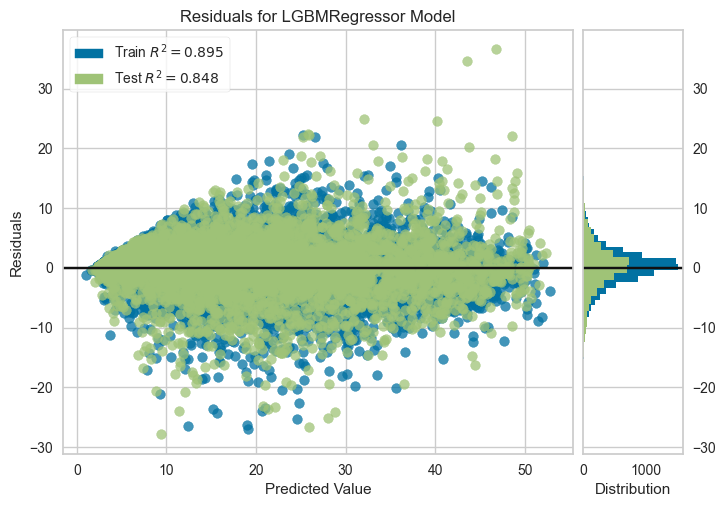

In [25]:
exp.plot_model(best_model)

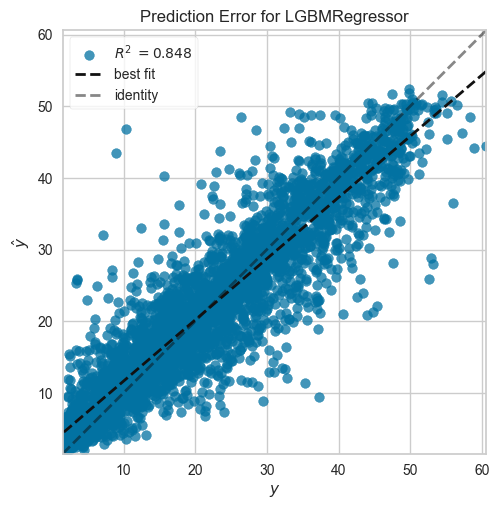

In [26]:
exp.plot_model(best_model, plot='error')

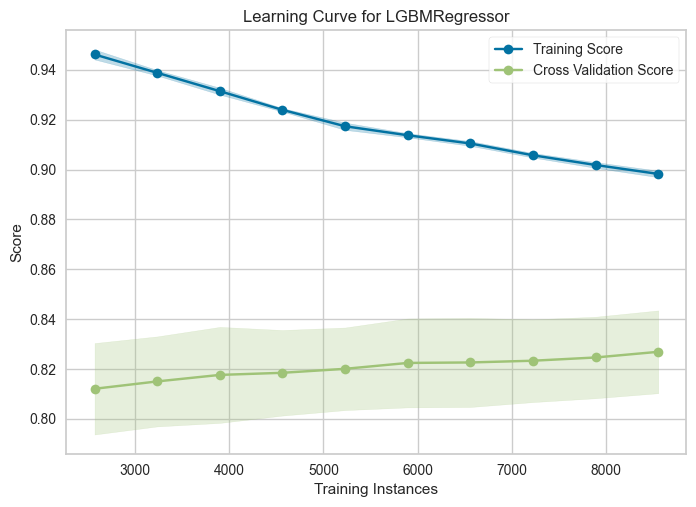

In [27]:
exp.plot_model(best_model, plot='learning')

In [29]:
exp.save_model(best_model, 'models/Fisrt_models')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['humidity', 'temperature',
                                              'dayofweek', 'month', 'day',
                                              'pm_2_5_lag_1', 'pm_2_5_lag_2',
                                              'pm_2_5_lag_3', 'pm_2_5_lag_4',
                                              'pm_2_5_lag_5', 'pm_2_5_lag_6',
                                              'pm_2_5_lag_7'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('remove_outliers',
                  TransformerWrapper(transformer=RemoveOutliers(random_state=123))),
                 ('trained_model',
                  LGBMRegressor(device='gpu', n_jobs=-1, random_state

In [14]:
from pycaret.regression import *
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predict on the test set
test_predictions = exp.predict_model(best_model, data=compare_data)

# Extract actual values and predicted values
y_true = compare_data["pm_2_5"].values
y_pred = test_predictions["prediction_label"].values

# Calculate Regression Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate MAPE and Accuracy
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
accuracy = 100 - mape  # Convert to Accuracy %

# Print Results
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2.8827,28.4557,5.3344,0.3819,0.1738,0.1156


R² Score: 0.3819
Mean Absolute Error (MAE): 2.8827
Root Mean Squared Error (RMSE): 5.3344
Mean Absolute Percentage Error (MAPE): 11.56%
Accuracy: 88.44%


In [35]:
from pycaret.regression import *
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predict on the test set
test_predictions = exp.predict_model(best_model, data=df)

# Extract actual values and predicted values
y_true = df["pm_2_5"].values
y_pred = test_predictions["prediction_label"].values

# Calculate Regression Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate MAPE and Accuracy
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
accuracy = 100 - mape  # Convert to Accuracy %

# Print Results
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2.8905,17.9784,4.2401,0.8841,0.2473,0.2084


R² Score: 0.8841
Mean Absolute Error (MAE): 2.8905
Root Mean Squared Error (RMSE): 4.2401
Mean Absolute Percentage Error (MAPE): 20.84%
Accuracy: 79.16%


In [30]:
from pycaret.regression import *
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predict on the test set
test_predictions = exp.predict_model(best_model, data=df_test)

# Extract actual values and predicted values
y_true = df_test["pm_2_5"].values
y_pred = test_predictions["prediction_label"].values

# Calculate Regression Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate MAPE and Accuracy
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
accuracy = 100 - mape  # Convert to Accuracy %

# Print Results
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,3.3688,24.1748,4.9168,0.8508,0.2988,0.2842


R² Score: 0.8508
Mean Absolute Error (MAE): 3.3688
Root Mean Squared Error (RMSE): 4.9168
Mean Absolute Percentage Error (MAPE): 28.42%
Accuracy: 71.58%


In [68]:
df_test2 = pd.read_csv("data_preprocess\export-jsps017-1h.csv", parse_dates=["timestamp"], index_col="timestamp")
df_test2 = df_test2.sort_values(by="timestamp")
df_test2['dayofweek'] = df_test2.index.dayofweek
df_test2['month'] = df_test2.index.month
df_test2['day'] = df_test2.index.day

In [69]:
# Create lag features for the past 7 days
for lag in range(1, 8):  # Lags from 1 to 7 days
    df_test2[f'pm_2_5_lag_{lag}'] = df_test2['pm_2_5'].shift(lag)

# Drop NaN values caused by shifting
df_test2.dropna(inplace=True)
df_test2 = df_test2.drop(columns=["Unnamed: 0", "timezone", "pm_2_5_sp"], axis=1)

In [70]:
df_test2 = df_test2[(np.abs(stats.zscore(df_test2['humidity'])) < 3)]  # ลบค่าผิดปกติออก
df_test2 = df_test2[(np.abs(stats.zscore(df_test2['temperature'])) < 3)]  # ลบค่าผิดปกติออก
df_test2 = df_test2[(np.abs(stats.zscore(df_test2['pm_2_5'])) < 3)]  # ลบค่าผิดปกติออก

In [71]:
from pycaret.regression import *
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predict on the test set
test_predictions = exp.predict_model(best_model, data=df_test2)

# Extract actual values and predicted values
y_true = df_test2["pm_2_5"].values
y_pred = test_predictions["prediction_label"].values

# Calculate Regression Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate MAPE and Accuracy
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
accuracy = 100 - mape  # Convert to Accuracy %

# Print Results
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,4.7064,112.1513,10.5902,0.6364,0.3314,0.3031


R² Score: 0.6364
Mean Absolute Error (MAE): 4.7064
Root Mean Squared Error (RMSE): 10.5902
Mean Absolute Percentage Error (MAPE): 30.31%
Accuracy: 69.69%


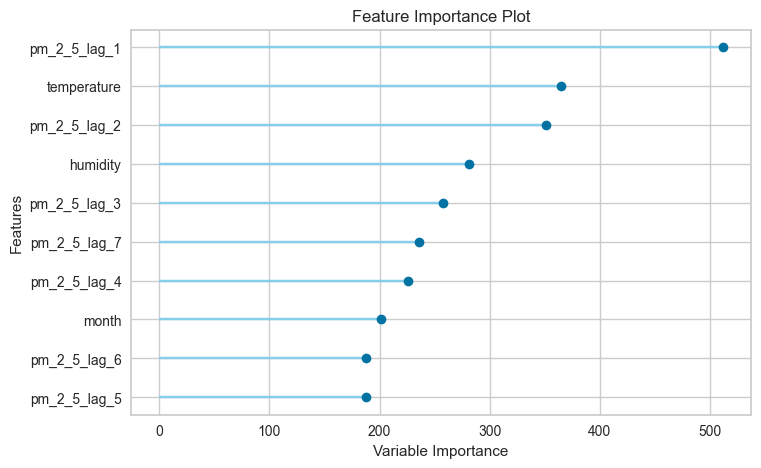

In [73]:
plot_model(best_model, plot='feature')